<a href="https://colab.research.google.com/github/rakshitaggarwal/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression_Economics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [176]:
df=pd.read_csv('economic_index.csv')

In [177]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [178]:
##dropping unnecessary cols
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [179]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [180]:
##check for null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [181]:
import seaborn as sns

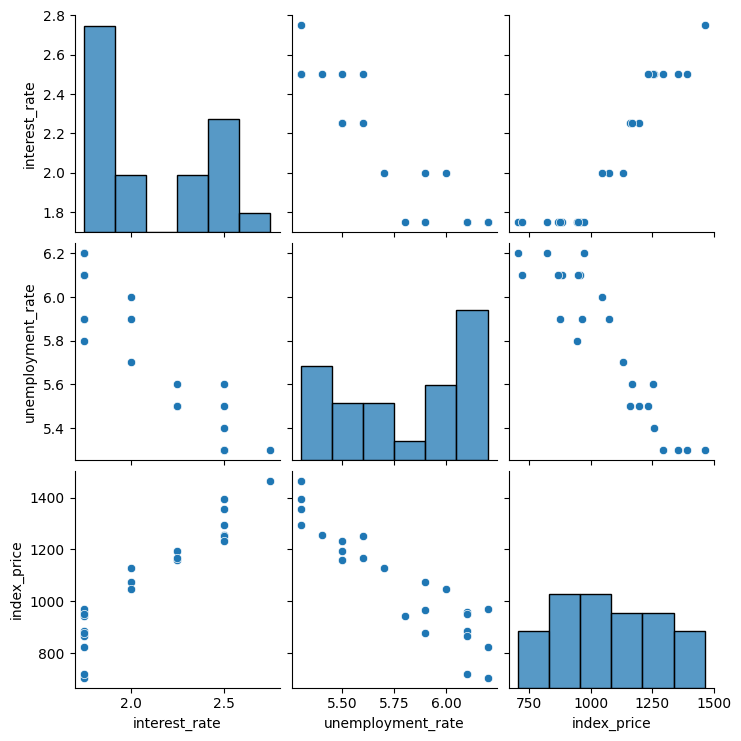

In [182]:
sns.pairplot(df)

In [183]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

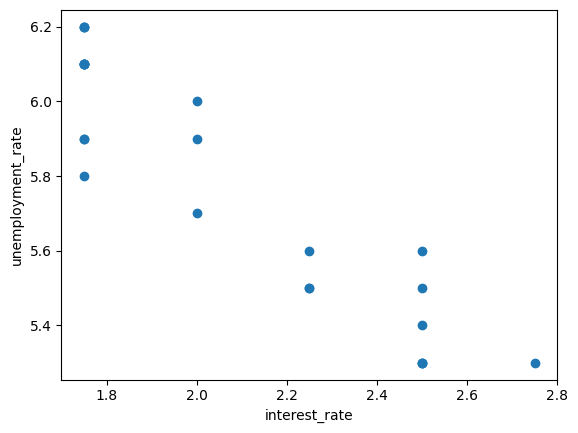

In [184]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [185]:
##independent and dependent features
x=df[['interest_rate','unemployment_rate']]
y=df[['index_price']]

In [186]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [187]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [188]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

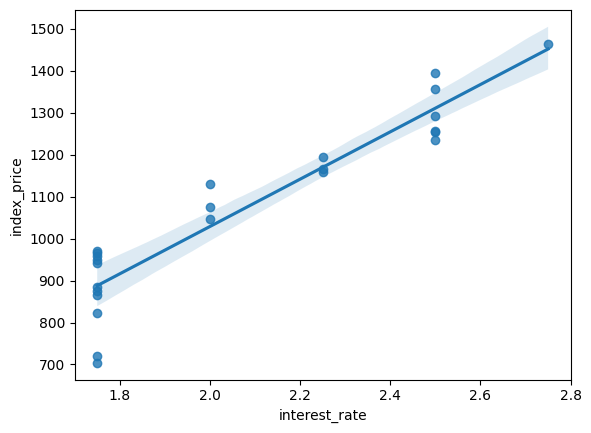

In [189]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

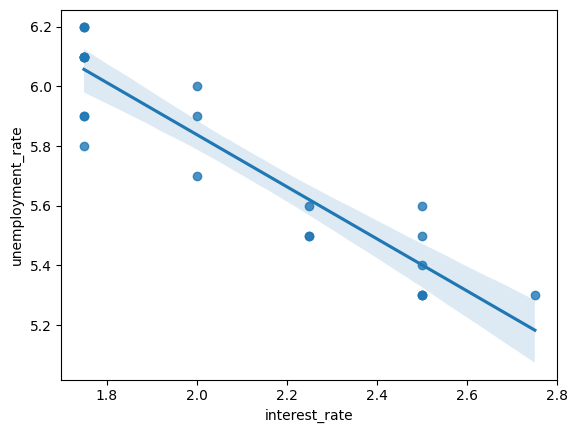

In [190]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])


In [191]:
##standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [192]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [193]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [194]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [195]:
regression.fit(x_train,y_train)

LinearRegression()

In [196]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_absolute_error',cv=5)

In [197]:
validation_score


array([-35.61778846, -78.17705882, -82.41929311, -73.74953633,
       -24.64102564])

In [198]:
##avg
np.mean(validation_score)

np.float64(-58.92094047300401)

In [199]:
##prediction
y_pred=regression.predict(x_test)

In [200]:
y_pred

array([[1204.22770398],
       [ 821.65051903],
       [1406.51300368],
       [ 857.70889608],
       [ 994.90992298],
       [1168.16932693]])

In [201]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [202]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

Mean absolute error: 59.935781523235484
Mean squared error: 5793.762887712569
Root mean squared error: 76.11677139574805


In [203]:
score=r2_score(y_test,y_pred)
score

0.8278978091457145

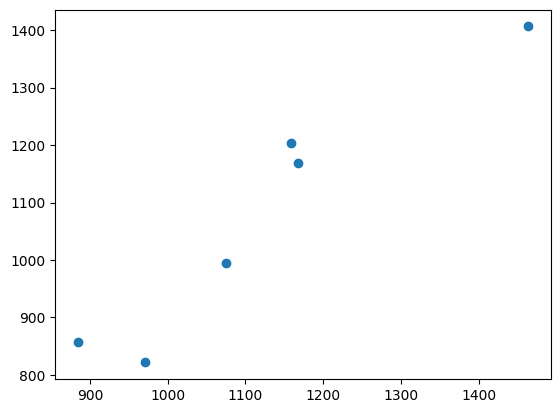

In [204]:
##assumptions
plt.scatter(y_test,y_pred)

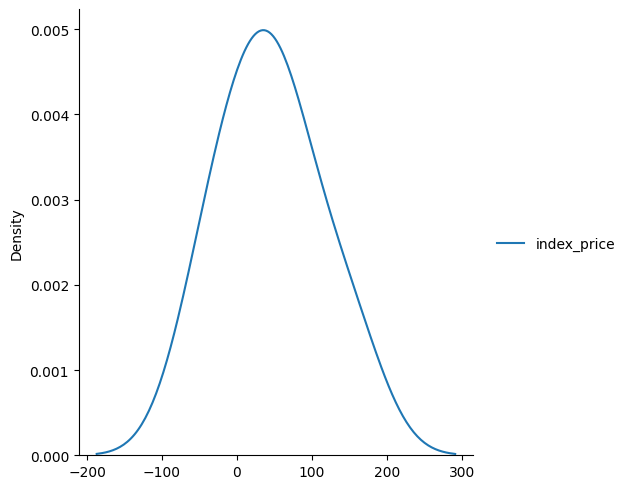

In [205]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

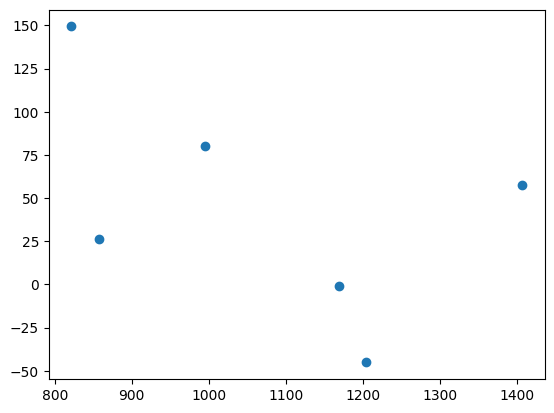

In [206]:
##scatter plot with respect to predictions ans residuals
plt.scatter(y_pred,residuals)

In [207]:
##Linear regression using OLS
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()


In [208]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                       0.754
Time:                        19:54:34   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
print(regression.coef_)

[[  88.27275507 -116.25716066]]
